mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is gsmtask_names is ['gsm_']


----------------
 NOTE: ONLY PRINTING 4 tasks ----------------

mode is instructtask_names is ['self_instruct_num_respondents_1_', 'anthropic_hh_rlhf_subset_hh_num_respondents_1_', 'vicuna_num_respondents_1_', 'koala_num_respondents_1_', 'anthropic_hh_rlhf_subset_red_team_num_respondents_1_', 'grammar_path_src_helm_benchmark_scenarios_best_chatgpt_prompts.yaml_tags_num_respondents_1_']


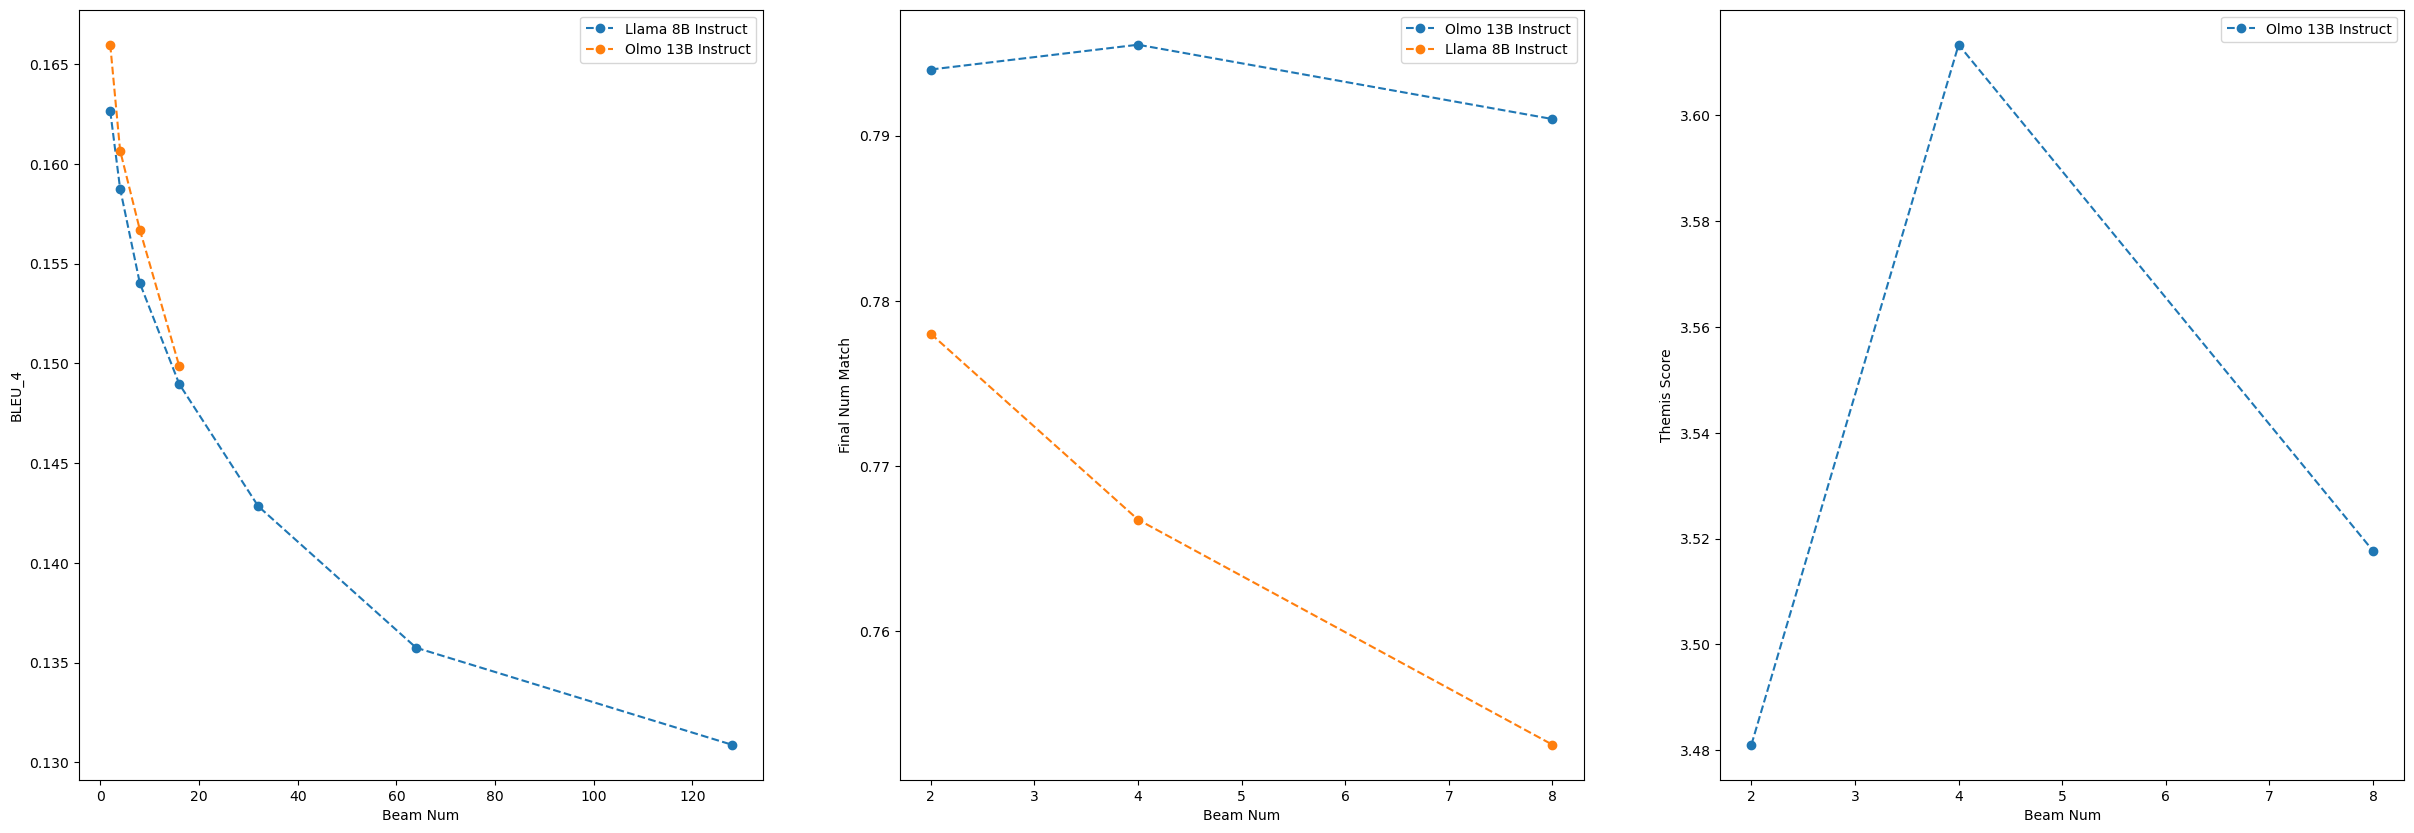

In [4]:


import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *
from process_gen_utils import *










def get_examples_df(process_gen_modes,df_file, recalculate_everything=False):
    processGens=ProcessGens()

    root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric = get_process_gen_params(process_gen_modes[0])
    if recalculate_everything or not os.path.isfile(df_file):
        
        print("Recalculate everything!!!!!")
        processGens.init_with_mode(process_gen_modes)
        root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric = processGens.get_params()

        examples_df, _=get_dfs(processGens)
        examples_df.to_pickle(df_file)

    else:
        examples_df = pd.read_pickle(df_file)


    return examples_df, processGens, (root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric)


instruct_tasks=['self_instruct_num_respondents_1_', 'anthropic_hh_rlhf_subset_hh_num_respondents_1_', 'vicuna_num_respondents_1_', 'koala_num_respondents_1_', 'anthropic_hh_rlhf_subset_red_team_num_respondents_1_', 'grammar_path_src_helm_benchmark_scenarios_best_chatgpt_prompts.yaml_tags_num_respondents_1_']




# cur_mode="beam_instruct"
# cur_mode="beam_gsm_olmo"
# cur_mode="beam_gsm_llama"
# cur_mode="beam_wmt_llama"
# cur_mode="beam_wmt_olmo"




info_dicts=[]
gen_mode_to_df={}

examples_df=None


def beam_curse(ax, process_gen_modes):
    pkl_name="_".join(process_gen_modes)
    df_file =f"pkl_files/{pkl_name}.pkl"

    examples_df,processGens,(root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric)= get_examples_df(process_gen_modes, df_file=df_file, recalculate_everything=False)
    
    if process_gen_modes=="beam_instruct":
        examples_df.loc[examples_df['task_name'].isin(instruct_tasks), 'task_name'] = "Instruct"
        for col_name in ["example_themis"]:
            examples_df[col_name]=examples_df[col_name].replace(0, np.nan)
    
    beam_nums = list(examples_df["beam_num"].unique())
    models= list(examples_df["model"].unique())
    for model in models:
        
        filtered_df = examples_df[examples_df["model"]==model]
        scores = [filtered_df[filtered_df["beam_num"]==beam_num][compare_metric].mean() for beam_num in beam_nums]
        ax.plot(beam_nums, scores,'--o', label=get_model_details(model)['name'])


        readable_labels={"beam_num": "Beam Num", "example_themis":"Themis Score", "BLEU_4": "BLEU_4", "final_num_exact_match":"Final Num Match"}

        ax.set_ylabel(readable_labels[compare_metric])
        ax.set_xlabel(readable_labels["beam_num"])
        ax.legend()


fig, ax=plt.subplots(1,3, figsize=(30,10))

beam_curse(ax=ax[0], process_gen_modes=["beam_wmt_llama","beam_wmt_olmo" ])
beam_curse(ax=ax[1], process_gen_modes=["beam_gsm_olmo","beam_gsm_llama" ])
beam_curse(ax=ax[2], process_gen_modes=["beam_instruct"])









In [2]:
print(examples_df.columns)

AttributeError: 'NoneType' object has no attribute 'columns'

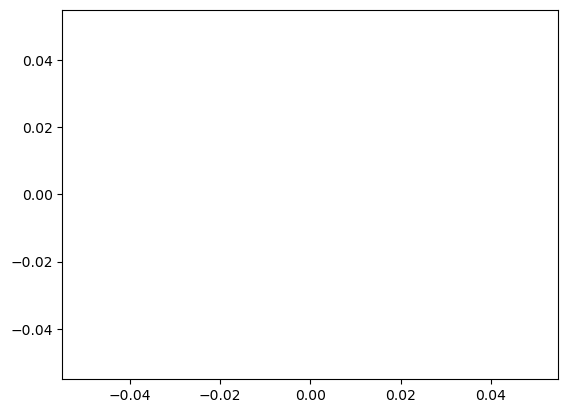

In [3]:
models = list(examples_df["model"].unique())

for model in models:
    x=[]
    y=[]
    for info_dict in info_dicts:
        if info_dict["model"]==model:
            x.append(info_dict["beam_num"])
            y.append(info_dict["mean"])
    fig, ax = plt.subplots()
    ax.scatter(x,y)

#     scatter_dict={}
#     model = scatter_dict["model"]
#     if scatter_dict[model]=

